# Showcasing how the original image of an audience is split in order to improve face detection

In [1]:
%load_ext autoreload
%autoreload 2

import os
import matplotlib.pyplot as plt
import copy
from attention.img_proc.img_split import split_image, reconstruct_coord, bbox_merge
from attention.img_proc.img_annot import annotate_bboxes
from attention.utils.img_vid_utils import read_image, load_image_paths
from attention.utils.img_plot import plot_crops
from attention.models.face_models import detect_face
from attention.params import DATA_DIRECTORY

objc[90384]: Class CaptureDelegate is implemented in both /Users/amine/.pyenv/versions/3.10.6/envs/attention-env/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x1631524e8) and /Users/amine/.pyenv/versions/3.10.6/envs/attention-env/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_videoio.3.4.16.dylib (0x146948860). One of the two will be used. Which one is undefined.
objc[90384]: Class CVWindow is implemented in both /Users/amine/.pyenv/versions/3.10.6/envs/attention-env/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x163152538) and /Users/amine/.pyenv/versions/3.10.6/envs/attention-env/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x130fdca68). One of the two will be used. Which one is undefined.
objc[90384]: Class CVView is implemented in both /Users/amine/.pyenv/versions/3.10.6/envs/attention-env/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x163152560) and /Users/amine/.pyenv/versions/3.10.6/envs/attention-env/lib/python3.10/site-packages/me

## Original audience image 

### Loading the image

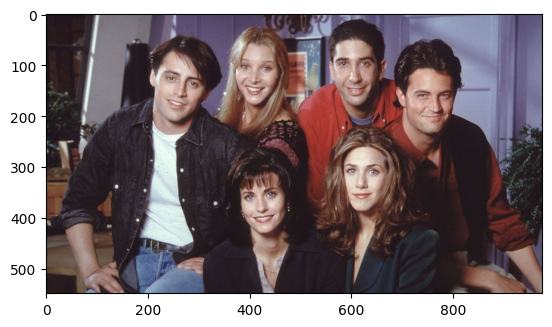

In [2]:
frames_folder_path = os.path.join(DATA_DIRECTORY, "00_inputs", "01_frames")
audience_path = list(load_image_paths(frames_folder_path).values())[0]
audience_image = read_image(audience_path)
plt.imshow(audience_image)

### Detecting faces on the original image

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


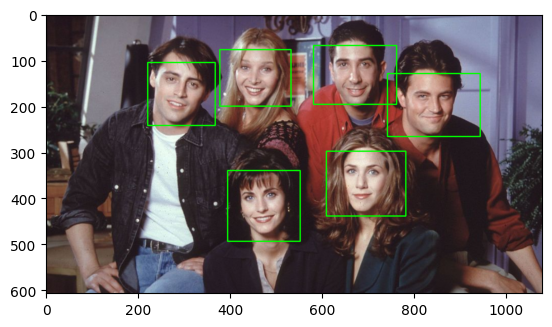

In [3]:
coord_set = detect_face(audience_image)
audience_image_annot = annotate_bboxes(audience_image, coord_set)
plt.imshow(audience_image_annot)

## Zooming into original image

### Splitting the image into a set of crops

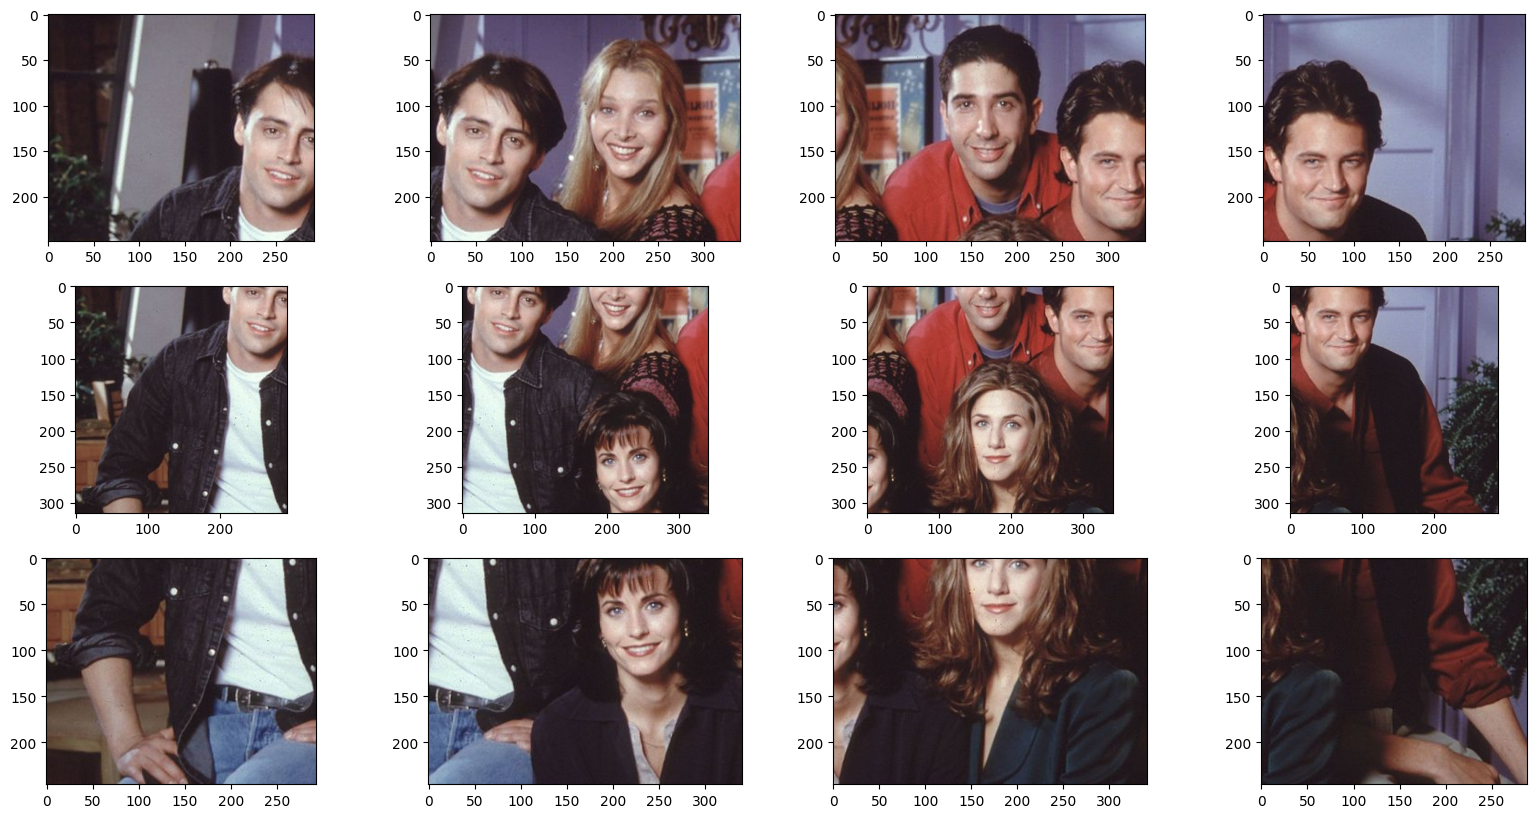

In [4]:
crops = split_image(audience_image, n_split_w=4, n_split_h=3, overlap_w=0.05, overlap_h=0.12)
plot_crops(crops)

### Detecting the faces on each crop

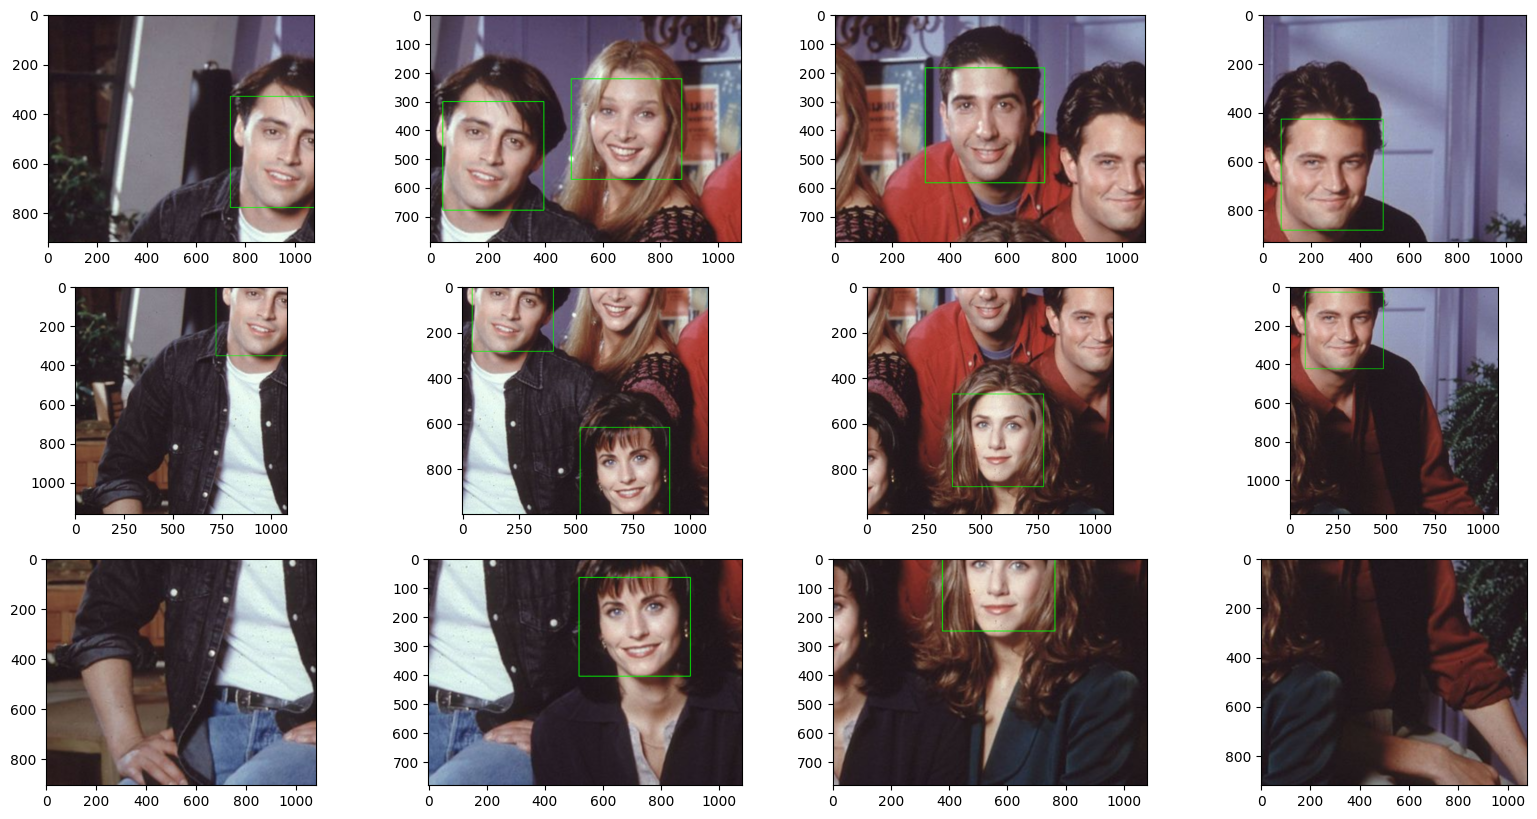

In [5]:
crops_annot = copy.deepcopy(crops)
bbox_crop_list = []
for crop in crops_annot:
    coord_set = detect_face(crop.image)
    bbox_crop_list.append(coord_set)
    crop.image = annotate_bboxes(crop.image, coord_set)
plot_crops(crops_annot)
    

### Merging duplicate face boxes (bboxes) for each face

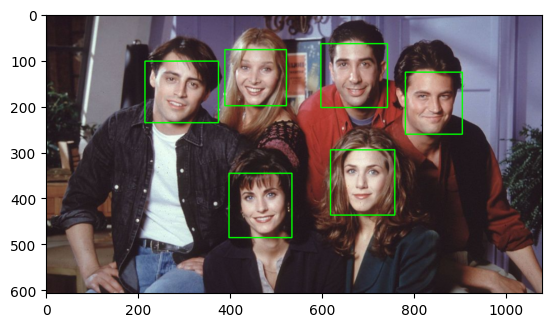

In [6]:
# Generating bboxes coordinates in the original image system of coordinate  
bbox_crop_list_absolute = []
for idx, coord_set in enumerate(bbox_crop_list):
    coord_set_absolute = reconstruct_coord(crops[idx], coord_set)
    bbox_crop_list_absolute.append(coord_set_absolute)

# Eliminating duplicates bboxes
bbox_list = bbox_merge(bbox_crop_list_absolute, intersect_threshold=0.6)

# Drawing the unique bboxes on the original image
audience_image_reconstructed = annotate_bboxes(audience_image, bbox_list)

plt.imshow(audience_image_reconstructed)